# H1B Visa Petitions Decision Prediction

### Step 1: Import everything at once for the complete project at a single instance

In [1]:
##basic library - Pandas and Numpy
import pandas as pd
import numpy as np

## Imports for Data Consistency - String Match
import difflib as dff

## Imports for different type of classfiers
from sklearn import tree # <- Decision- Trees
from sklearn import svm # <- Support Vector Machines
import sklearn.linear_model as linear_model # <- Logisitic Regression - Sigmoid Function on the Linear Regression
from sklearn.ensemble import RandomForestClassifier # <- Random Forest Classifier
from sklearn.neural_network import MLPClassifier # <- Neural Networks
from sklearn.naive_bayes import GaussianNB # <- Gaussian Naive-Bayes Classifier

## Imports for recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

## Imports for splitting the data into training and test data
from sklearn.model_selection import train_test_split

## Imports for evaluating the different classifier models selected
import sklearn.metrics as metrics
from sklearn import preprocessing

## Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Import the data and load it into a pandas dataframe for further cleaning and Analysis

In [2]:
## Input the data's absolute/relative path from the user
path_excel = "h1b_train.csv"

In [3]:
## Define the column names and read the data file into a pandas dataframe
column_names = ['CASE_STATUS', 'EMPLOYER_NAME','SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'FILING_YEAR',\
               'WORKSITE', 'LONGITUDE', 'LATITUDE']
table_1 = pd.read_table(path_excel, names = column_names, skiprows = 1, error_bad_lines = False, sep = ',')

In [4]:
pd.set_option('display.max_colwidth', -1)
pd.options.mode.chained_assignment = None

In [5]:
table_1.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,FILING_YEAR,WORKSITE,LONGITUDE,LATITUDE
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY OF TOMKINS PLC",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


# Data Analysis and Preprocessing 

### Case Status v/s Number of Petitions of the visa petition - Data Analysis1

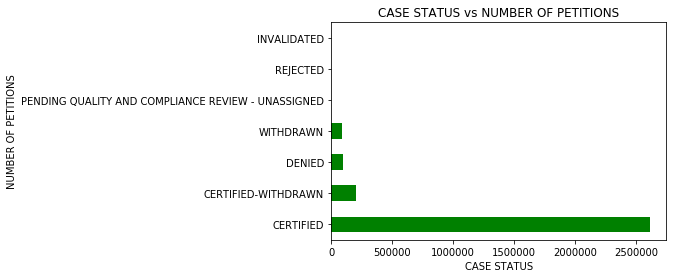

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                   202659 
DENIED                                                94346  
WITHDRAWN                                             89799  
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED    15     
REJECTED                                              2      
INVALIDATED                                           1      
Name: CASE_STATUS, dtype: int64


In [6]:
plot_status_numberinit = table_1['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'barh', color = 'green')
plot_status_numberinit.set_xlabel("CASE STATUS")
plot_status_numberinit.set_ylabel("NUMBER OF PETITIONS")
plt.show()
print(table_1['CASE_STATUS'].value_counts())

Data Type and String Data Format conversion to upper case

In [7]:
table_2 = table_1.loc[table_1['CASE_STATUS'].isin(["CERTIFIED", "DENIED", "REJECTED"])]

In [8]:
table_2['FILING_YEAR'] = table_2['FILING_YEAR'].astype(int)
table_2['EMPLOYER_NAME'] = table_2['EMPLOYER_NAME'].str.upper()
table_2['SOC_NAME'] = table_2['SOC_NAME'].str.upper()
table_2['JOB_TITLE'] = table_2['JOB_TITLE'].str.upper()
table_2['FULL_TIME_POSITION'] = table_2['FULL_TIME_POSITION'].str.upper()#datatype conversion for the year column

In [9]:
table_2.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,FILING_YEAR,WORKSITE,LONGITUDE,LATITUDE
19,CERTIFIED,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,Y,187200.0,2016,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108
20,CERTIFIED,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",Y,241842.0,2016,"ALEXANDRIA, VIRGINIA",-77.046921,38.804835
23,CERTIFIED,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,Y,99986.0,2016,"SAN DIEGO, CALIFORNIA",-117.161084,32.715738
24,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986.0,2016,"CHULA VISTA, CALIFORNIA",-117.084196,32.640054
26,CERTIFIED,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,Y,187200.0,2016,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108


### Row Counts v/s Case Status of the visa petition - Data Analysis1

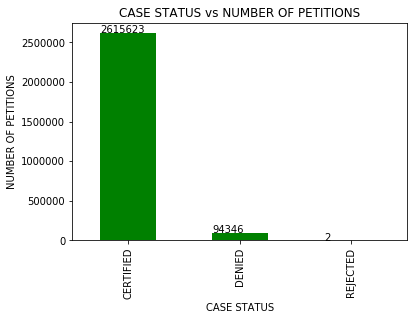

In [10]:
plot_status_number = table_2['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'green')
plot_status_number.set_xlabel("CASE STATUS")
plot_status_number.set_ylabel("NUMBER OF PETITIONS")
for p in plot_status_number.patches:
    plot_status_number.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plot_status_number


### The top 15 employers filing the H1-B visa petitions - Data Analysis2

INFOSYS LIMITED                                    130241
TATA CONSULTANCY SERVICES LIMITED                  64358 
WIPRO LIMITED                                      43679 
DELOITTE CONSULTING LLP                            36667 
ACCENTURE LLP                                      32983 
IBM INDIA PRIVATE LIMITED                          28166 
MICROSOFT CORPORATION                              22373 
HCL AMERICA, INC.                                  22330 
ERNST & YOUNG U.S. LLP                             18217 
LARSEN & TOUBRO INFOTECH LIMITED                   16724 
CAPGEMINI AMERICA INC                              16032 
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION    15448 
GOOGLE INC.                                        12545 
IGATE TECHNOLOGIES INC.                            12196 
IBM CORPORATION                                    10690 
Name: EMPLOYER_NAME, dtype: int64


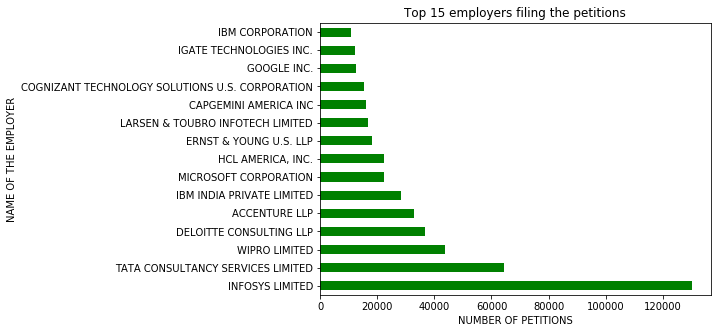

In [11]:
plot_status_topemp= table_2['EMPLOYER_NAME'].value_counts().head(15).plot.barh(title = "Top 15 employers filing the petitions", \
                                                                 color = 'green', figsize = (7, 5))
plot_status_topemp.set_ylabel("NAME OF THE EMPLOYER")
plot_status_topemp.set_xlabel("NUMBER OF PETITIONS")
plot_status_topemp
print(table_2['EMPLOYER_NAME'].value_counts().head(15))

### The top 15 SOC names for which H1-B visas are raised - Data Analysis3

COMPUTER SYSTEMS ANALYSTS                             469300
SOFTWARE DEVELOPERS, APPLICATIONS                     372125
COMPUTER PROGRAMMERS                                  360575
COMPUTER OCCUPATIONS, ALL OTHER                       164659
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                 75806 
MANAGEMENT ANALYSTS                                   62096 
ACCOUNTANTS AND AUDITORS                              49780 
FINANCIAL ANALYSTS                                    46730 
MECHANICAL ENGINEERS                                  39844 
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS           36219 
DATABASE ADMINISTRATORS                               35303 
MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS    34433 
ELECTRONICS ENGINEERS, EXCEPT COMPUTER                31782 
PHYSICIANS AND SURGEONS, ALL OTHER                    30641 
OPERATIONS RESEARCH ANALYSTS                          30328 
Name: SOC_NAME, dtype: int64


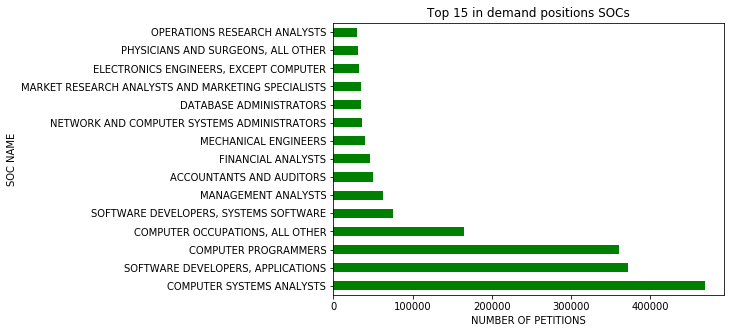

In [12]:
plot_status_topsoc= table_2['SOC_NAME'].value_counts().head(15).plot.barh(title = "Top 15 in demand positions SOCs", \
                                                                 color = 'green', figsize = (7, 5))
plot_status_topsoc.set_ylabel("SOC NAME")
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS")
plot_status_topsoc
print(table_2['SOC_NAME'].value_counts().head(15))

### Acceptance rate of the H1-B Visa petitions through different years - Data Analysis4

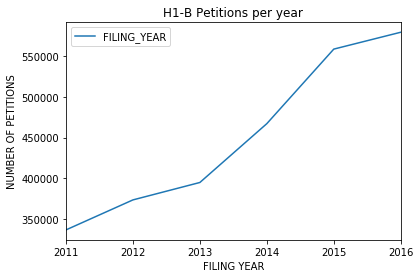

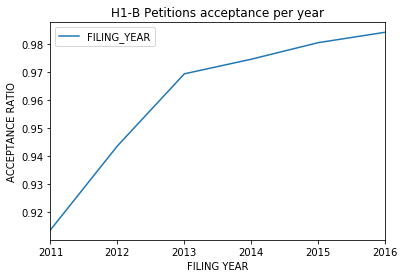

In [13]:
dfplot_status_fyear = pd.DataFrame(table_2['FILING_YEAR'].value_counts())
dfplot_status_fyear = dfplot_status_fyear.sort_values(['FILING_YEAR'])
plot_status_fyear = dfplot_status_fyear.plot(title = 'H1-B Petitions per year', kind = 'line')
plot_status_fyear.set_xlabel('FILING YEAR')
plot_status_fyear.set_ylabel('NUMBER OF PETITIONS')
plt.show()

dfstatus_acceptance_peryear = pd.DataFrame(table_2[table_2['CASE_STATUS'] == 'CERTIFIED'].FILING_YEAR.value_counts() / table_2.FILING_YEAR.value_counts())
dfstatus_acceptance_peryear = dfstatus_acceptance_peryear.sort_values(['FILING_YEAR'])
status_acceptance_peryear = dfstatus_acceptance_peryear.plot(title = 'H1-B Petitions acceptance per year', kind = 'line')
status_acceptance_peryear.set_xlabel('FILING YEAR')
status_acceptance_peryear.set_ylabel('ACCEPTANCE RATIO')
plt.show()

### Salaries trend per year - Data Analysis5

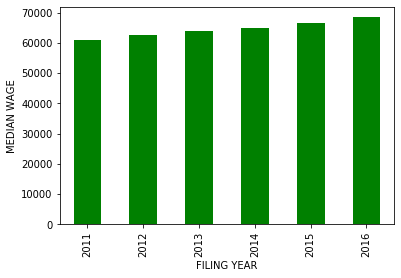

,PREVAILING_WAGE
,median
FILING_YEAR,
2011,60882.0
2012,62462.0
2013,63939.0
2014,64958.0
2015,66394.0
2016,68411.0


In [14]:
dfsalaries_trends_year = table_2.loc[:,['PREVAILING_WAGE', 'FILING_YEAR']].groupby(['FILING_YEAR']).agg(['median'])

plot_salaries_trends_year = dfsalaries_trends_year.plot(kind = 'bar', color = 'g', legend = None)
plot_salaries_trends_year.set_xlabel('FILING YEAR')
plot_salaries_trends_year.set_ylabel('MEDIAN WAGE')
plt.show()
dfsalaries_trends_year

### Step 3: Filter the rows and keep the ones with case status as 'CERTIFIED' or 'DECLINED'

In [15]:
print(table_2['CASE_STATUS'].unique())
table_2 = table_2.loc[table_2['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])] #filtering

['CERTIFIED' 'DENIED' 'REJECTED']


### Step 4: Remove rows with null values for EMPLOYER_NAME, SOC_NAME, JOB_TITLE, FULL_TIME_POSITION, PREVAILING_WAGE

In [16]:
table_2.isnull().sum(axis = 0)

CASE_STATUS           0    
EMPLOYER_NAME         18   
SOC_NAME              15893
JOB_TITLE             10   
FULL_TIME_POSITION    1    
PREVAILING_WAGE       53   
FILING_YEAR           0    
WORKSITE              0    
LONGITUDE             97071
LATITUDE              97071
dtype: int64

In [17]:
table_3 = table_2.dropna(axis=0, how='any', subset = ['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 
                                                      'FULL_TIME_POSITION', 'PREVAILING_WAGE'])


### Step 5: Find the number of certified and denied of all the needed columns with their count

In [18]:
print(table_2.shape)
print(table_3.shape)

(2709969, 10)
(2694002, 10)


In [19]:
table_3.CASE_STATUS.value_counts()

CERTIFIED    2600241
DENIED       93761  
Name: CASE_STATUS, dtype: int64

### Step 6: Downsampling the Data to match the ratio of certified and denied samples

In [20]:
table_temp_2_Dx = table_3[table_3['CASE_STATUS'] == 'DENIED']
#table_temp_2_Dx.duplicated(features_for_dup_removal).value_counts()

In [21]:
table_temp_2_Cx = table_3[table_3['CASE_STATUS'] == 'CERTIFIED']
#table_temp_2_Cx.duplicated(features_for_dup_removal).value_counts()

In [22]:
Input_Certified, Input_Certified_extra, y_certified, y_certified_extra = train_test_split(table_3[table_3.CASE_STATUS == 'CERTIFIED'],\
                                                                                          table_temp_2_Cx.CASE_STATUS, train_size= 0.06, random_state=1)

#Input_Certified is the needed x axis data
#Input_certified_extra is the eliminitated attributes data
#Same applied for the Y axis but as the values are "Certified" throughout, it doesn't matter

In [23]:
training_dataframe = Input_Certified.append(table_temp_2_Dx)

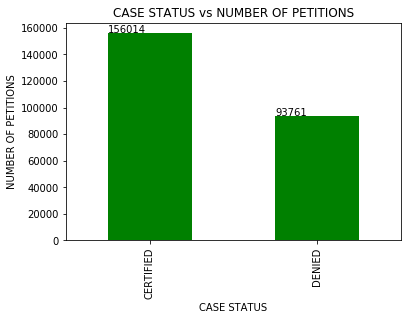

In [24]:
## plot the distribution of the certified and denied samples after downsampling
plot_after_ds = training_dataframe['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'green')
plot_after_ds.set_xlabel("CASE STATUS")
plot_after_ds.set_ylabel("NUMBER OF PETITIONS")
for p in plot_after_ds.patches:
    plot_after_ds.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plt.show()

# Features Creation and Categorisation

For the given categorical data, they need to convert it to numerical values

There are three ways to convert the categorical data to numerical ones.

1. Encoding to ordinal values
2. Feature Hashing
3. One-Hot Encoding

Prior selecting any of the above methods, it is necessary to get the details of the unique values for each of the columns/Features. Below is the plot for the same.

In [25]:
# one-hot encoding for every possible and needed column
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_NAME.nunique())
print("Prevailing Wages ",training_dataframe.PREVAILING_WAGE.nunique())
print("Unique SOCs ", training_dataframe.SOC_NAME.nunique())
print("Unique Job Titles ",training_dataframe.JOB_TITLE.nunique())
print("Unique Filing Year ",training_dataframe.FILING_YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  80566
Prevailing Wages  24804
Unique SOCs  983
Unique Job Titles  53272
Unique Filing Year  6
Unique Worksite State  8637
Unique Employment Type  2


### Step 8: Feature Categorisation Functions

In [26]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [27]:
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [28]:
def state_extractor(work_site):
    return work_site.split(', ')[1]

### Step 9: Feature Creation for One-Hot Encoding

In [29]:
training_dataframe['WORKSITE'] = training_dataframe['WORKSITE'].apply(state_extractor)

In [30]:
training_dataframe.WORKSITE.unique()

array(['PENNSYLVANIA', 'TEXAS', 'NEW YORK', 'CALIFORNIA', 'CONNECTICUT',
       'WASHINGTON', 'MISSOURI', 'OREGON', 'VIRGINIA', 'MASSACHUSETTS',
       'OHIO', 'ILLINOIS', 'FLORIDA', 'TENNESSEE', 'IDAHO', 'MARYLAND',
       'GEORGIA', 'NORTH CAROLINA', 'NEBRASKA', 'MINNESOTA', 'DELAWARE',
       'NEW HAMPSHIRE', 'ALABAMA', 'NEW JERSEY', 'WISCONSIN', 'ARIZONA',
       'INDIANA', 'MICHIGAN', 'IOWA', 'COLORADO', 'NEW MEXICO',
       'SOUTH CAROLINA', 'LOUISIANA', 'UTAH', 'KENTUCKY', 'ALASKA',
       'DISTRICT OF COLUMBIA', 'OKLAHOMA', 'ARKANSAS', 'RHODE ISLAND',
       'VERMONT', 'MAINE', 'MISSISSIPPI', 'NA', 'KANSAS', 'NEVADA',
       'HAWAII', 'WYOMING', 'PUERTO RICO', 'WEST VIRGINIA', 'MONTANA',
       'NORTH DAKOTA', 'SOUTH DAKOTA'], dtype=object)

In [31]:
training_dataframe['WAGE_CATEGORY'] = training_dataframe['PREVAILING_WAGE'].apply(wage_categorization)

In [32]:
training_dataframe_1 = training_dataframe.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
training_dataframe_1s = training_dataframe.loc[:,['SOC_NAME', 'CASE_STATUS']]
training_dataframe_1j = training_dataframe.loc[:,['JOB_TITLE', 'CASE_STATUS']]

In [33]:
training_dataframe_2_C = training_dataframe_1[training_dataframe_1.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
training_dataframe_2_Cs = training_dataframe_1s[training_dataframe_1s.CASE_STATUS == 'CERTIFIED'].SOC_NAME
training_dataframe_2_Cj = training_dataframe_1j[training_dataframe_1j.CASE_STATUS == 'CERTIFIED'].JOB_TITLE
positive_counts = training_dataframe_2_C.value_counts()
positive_counts_s = training_dataframe_2_Cs.value_counts()
positive_counts_j = training_dataframe_2_Cj.value_counts()

In [34]:
total_counts = training_dataframe_1.EMPLOYER_NAME.value_counts()
total_counts_s = training_dataframe_1s.SOC_NAME.value_counts()
total_counts_j = training_dataframe_1j.JOB_TITLE.value_counts()

In [35]:
final_ratio_series = positive_counts / total_counts

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
training_dataframe['EMPLOYER_ACCEPTANCE'] = training_dataframe.EMPLOYER_NAME.map(final_classification_employer)

In [36]:
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
training_dataframe['SOC_ACCEPTANCE'] = training_dataframe.SOC_NAME.map(final_classification_soc)

In [37]:
final_ratio_series_j = positive_counts_j / total_counts_j
final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
training_dataframe['JOB_ACCEPTANCE'] = training_dataframe.JOB_TITLE.map(final_classification_job)

In [38]:
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_ACCEPTANCE.nunique())
print("Wages Category", training_dataframe.WAGE_CATEGORY.nunique())
print("Unique SOCs ", training_dataframe.SOC_ACCEPTANCE.nunique())
print("Unique Job Titles ",training_dataframe.JOB_ACCEPTANCE.nunique())
print("Unique Filing Year ",training_dataframe.FILING_YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  6
Wages Category 5
Unique SOCs  6
Unique Job Titles  6
Unique Filing Year  6
Unique Worksite State  53
Unique Employment Type  2


In [39]:
dict_cs = {"CERTIFIED" : 1, "DENIED": 0}
dict_fp = {"Y" : 1, "N" : 0}
try:
    
    training_dataframe['CASE_STATUS'] = training_dataframe['CASE_STATUS'].apply(lambda x: dict_cs[x])
    training_dataframe['FULL_TIME_POSITION'] = training_dataframe['FULL_TIME_POSITION'].apply(lambda x: dict_fp[x])
except:
    pass


In [40]:
training_dataframe['FILING_YEAR'] = training_dataframe['FILING_YEAR'].astype('int')
training_dataframe.sort_index(inplace = True)
training_dataframe = training_dataframe.loc[:, ['CASE_STATUS', 'FILING_YEAR',\
                                                'WORKSITE', 'WAGE_CATEGORY',  'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 'FULL_TIME_POSITION']]
training_dataframe.head()

,CASE_STATUS,FILING_YEAR,WORKSITE,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,FULL_TIME_POSITION
40,0,2016,WASHINGTON,VERY HIGH,AR,LA,LA,1
48,0,2016,CALIFORNIA,VERY HIGH,AR,LA,LA,1
67,1,2016,GEORGIA,VERY HIGH,VHA,LA,LA,1
71,1,2016,PENNSYLVANIA,VERY HIGH,VHA,LA,LA,1
92,0,2016,MICHIGAN,HIGH,AR,VLA,LA,1


### Step 10: Apply One-hot encoding

In [41]:
final_df_train = pd.get_dummies(training_dataframe, columns=['FILING_YEAR', 'WORKSITE', 'FULL_TIME_POSITION', 'WAGE_CATEGORY', 'EMPLOYER_ACCEPTANCE',
                                                             
                                                                'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE' ], drop_first=True)
final_df_train.head()

,CASE_STATUS,FILING_YEAR_2012,FILING_YEAR_2013,FILING_YEAR_2014,FILING_YEAR_2015,FILING_YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
40,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
48,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
67,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
71,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
92,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


### Step 11: RFE for feature elimination

In [42]:
model = LogisticRegression()
rfe = RFE(model, 30)
fit = rfe.fit(final_df_train.iloc[:,1:], final_df_train.iloc[:,0])
support_rfe = rfe.support_
length_cols = list(final_df_train.iloc[:,1:].columns.values)
list_selected = []
for index in range(len(length_cols)):
    if support_rfe[index] == True:
        list_selected.append(length_cols[index])
    else:
        pass
print(list_selected)
print(rfe.ranking_)     # ref.ranking_ returns an array with positive integer values 
                         # to indicate the attribute ranking with a lower score indicating a higher ranking 

C:\Users\Work\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\Work\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Work\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

C:\Users\Work\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Work\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

KeyboardInterrupt: 

In [ ]:
unique_listcols = [col.split('_')[0] for col in list_selected]
set(unique_listcols)

Splitting into training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df_train.iloc[:,1:], final_df_train.iloc[:, 0], test_size = 0.20, random_state=1)
#y_train[y_train==1].shape
y_test[y_test==1].shape

In [ ]:
X_train.head()

# Training classifiers

## Decision Tree Model

In [ ]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)   

In [ ]:
y_pred = dtree.predict(X_test)

y_prob = dtree.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print()

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))
#print(metrics.precision_score(y_test,y_pred))   # Parameter "average" is requred if not a binary model
#print(metrics.recall_score(y_test,y_pred))      # Parameter "average" is requred if not a binary model
#print(metrics.f1_score(y_test,y_pred))  

## Logistic Regression Model

In [ ]:
lr_clf = linear_model.LogisticRegression()
lr_clf.fit(X_train, y_train)  

In [ ]:
y_pred_lr = lr_clf.predict(X_test)

probs = lr_clf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred_lr[:10])

print(metrics.confusion_matrix(y_test,y_pred_lr))
print(metrics.classification_report(y_test, y_pred_lr))
#print(metrics.precision_score(y_test,y_pred))   # Parameter "average" is requred if not a binary model
#print(metrics.recall_score(y_test,y_pred))      # Parameter "average" is requred if not a binary model
#print(metrics.f1_score(y_test,y_pred))

## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 75, random_state = 50)
# Train the model on training data
rf.fit(X_train, y_train)

In [ ]:
y_pred_rf =  rf.predict(X_test)
probs = rf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print(metrics.confusion_matrix(y_test,y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))
#print(metrics.precision_score(y_test,y_pred_rf))   # Parameter "average" is requred if not a binary model
#print(metrics.recall_score(y_test,y_pred))
#print(metrics.f1_score(y_test, y_pred))# Parameter "average" is requred if not a binary model

## Artificial Neural Networks

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20), max_iter=1000)
mlp.fit(X_train, y_train)

In [ ]:
y_pred_mlp = mlp.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_mlp)
print(confusion)
print(metrics.classification_report(y_test, y_pred_mlp))
#print(metrics.recall_score(y_test, y_pred))
#print(metrics.f1_score(y_test, y_pred))

## Gaussian Naive Bayes Classifier

In [ ]:
gaus_clf = GaussianNB()
gaus_clf.fit(X_train, y_train)

In [ ]:
y_pred_glb = gaus_clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_glb)
print(confusion)
print(metrics.classification_report(y_test, y_pred_glb))